# Logistic Regression For Titanic Tragedy Case

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Gender</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/ADMIN/Desktop/Python work/titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'titanic_test.csv'

In [ ]:
data.shape

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Here as we can see some of the columns are not significant as they don't have any singnificance on dependant variable
["Name" , "Cabin" , "Ticket" , "PassengerId"]

In [4]:
data.drop(["Name","Cabin","Ticket","PassengerId"], axis = 1, inplace = True)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
data.Age.fillna(29.699118, inplace=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

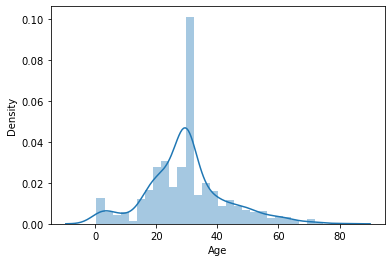

In [9]:
sns.distplot(data.Age)

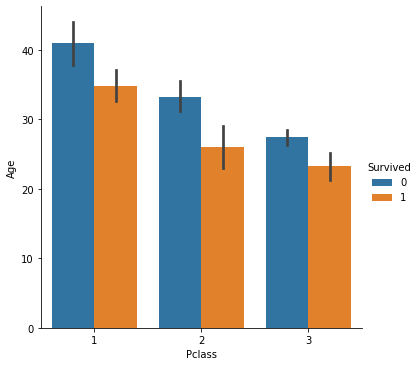

In [10]:
sns.catplot(x='Pclass', y='Age', hue='Survived' ,data= data, kind='bar')

In [11]:
# Upper Caping and Lower Caping for numerical Feature

def set_caping(column, capping):
   
    mean = data[column].mean() # Mean of the column
    std = data[column].std() # Standard Deviation of the column
   
    UCL = mean + 3 * std
    LCL = mean - 3 * std
    if capping == "both":
        data[column] = np.where((data[column] > UCL), UCL , data[column])
        data[column] = np.where((data[column] < UCL), LCL , data[column])
       
    elif capping == "upper":
        data[column] = np.where((data[column] > UCL), UCL , data[column])
       
    elif capping == "lower":
        data[column] = np.where((data[column] < UCL), LCL ,data[column])
    else:
        print("Please enter proper value of capping parameter. \n Possible values:\tboth\tupper\tlower")


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

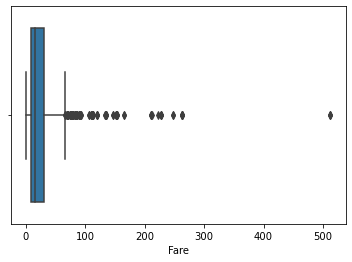

In [12]:
sns.boxplot(data.Fare)

In [13]:
set_caping("Fare", capping = "upper")

<AxesSubplot:>

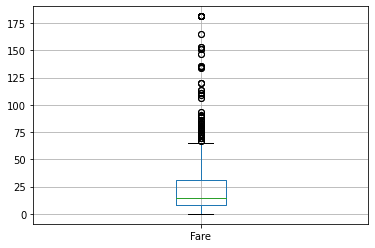

In [14]:
data.boxplot(column ="Fare")

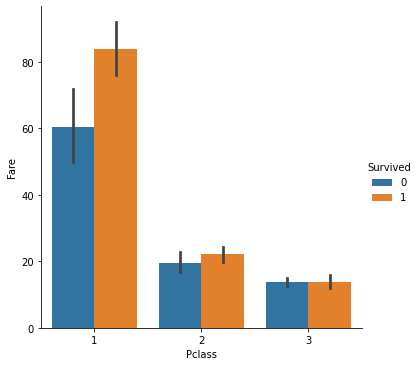

In [15]:
sns.catplot(x='Pclass', y='Fare', hue='Survived' ,data= data, kind='bar')

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
data.Pclass = data.Pclass.map({1: 'f', 2:'s', 3:'t'})

In [18]:
cat_data = data.select_dtypes('O')
cat_data.head()

,Pclass,Sex,Embarked
0,t,male,S
1,f,female,C
2,t,female,S
3,f,female,S
4,t,male,S


In [19]:
cat_data.columns

Index(['Pclass', 'Sex', 'Embarked'], dtype='object')

In [20]:
data.drop(cat_data.columns, axis = 1, inplace= True)

In [21]:
data = pd.concat([data,pd.get_dummies(cat_data, drop_first=True)], axis=1)

In [22]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_s,Pclass_t,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [23]:
# Deviding Dataset into x and y
y = data.iloc[:, 0]
x = data.iloc[:,1:8]

In [24]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
# Train Test Splitting
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

## SMOTE - Synthetic Minority Oversampling Technique

SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

There is a percentage of Over-Sampling which indicates the number of synthetic samples to be created and this percentage parameter of Over-sampling is always a multiple of 100.

This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

SMOTE proceeds by joining the points of the minority class with line segments and then places artificial points on these lines.

<img class="of qt s t u ir ai ja" width="820" height="361" role="presentation" src="https://miro.medium.com/max/820/1*nHwVl6AgcP_ym8RbXuKvSg.png">

In [27]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ADMIN\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    certifi-2020.12.5          |   py38haa244fe_1         144 KB  conda-forge
    conda-4.10.1               |   py38haa244fe_0         3.1 MB  conda-forge
    imbalanced-learn-0.8.0     |     pyhd8ed1ab_0         109 KB  conda-forge
    openssl-1.1.1k             |       h8ffe710_0         5.7 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.2 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanc

In [28]:
x_train.head()

,Age,SibSp,Parch,Fare,Pclass_s,Pclass_t,Sex_male
6,54.000000,0,0,51.8625,0,0,1
718,29.699118,0,0,15.5000,0,1,1
685,25.000000,1,2,41.5792,1,0,1
73,26.000000,1,0,14.4542,0,1,1
882,22.000000,0,0,10.5167,0,1,0


In [32]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [30]:
smt = SMOTE(random_state = 37) 
x_train_res, y_train_res = smt.fit_sample(x_train, y_train.ravel())

NameError: name 'SMOTE' is not defined

In [32]:
x_train.head()

,Age,SibSp,Parch,Fare,Pclass_s,Pclass_t,Sex_male
6,54.000000,0,0,51.8625,0,0,1
718,29.699118,0,0,15.5000,0,1,1
685,25.000000,1,2,41.5792,1,0,1
73,26.000000,1,0,14.4542,0,1,1
882,22.000000,0,0,10.5167,0,1,0


In [33]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

## Logistic Regression

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [35]:
logistic_model = LogisticRegression(solver='lbfgs').fit(x_train_res,y_train_res)
logistic_predict = logistic_model.predict(x_test)
logistic_conusion_matrix = confusion_matrix(y_test,logistic_predict)
logistic_conusion_matrix

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[148,  27],
       [ 29,  91]], dtype=int64)

## K - Nearest Neighbour

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# Choosing a K Value with Elbow method
error_rate = []
k_list = [3,7,9,11,13,15,17,19,21,23,25,27,29]
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_res,y_train_res)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

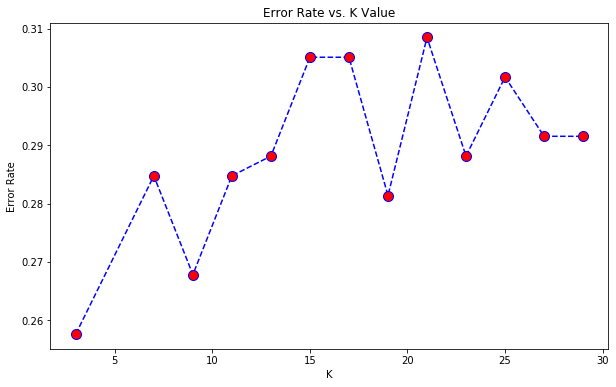

In [35]:
plt.figure(figsize=(10,6))
plt.plot(k_list,error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=21)
knn_model = knn_model.fit(x_train_res,y_train_res)
knn_predict = knn_model.predict(x_test)
knn_conusion_matrix = confusion_matrix(y_test,knn_predict)
knn_conusion_matrix

array([[116,  59],
       [ 32,  88]], dtype=int64)

## AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
adaboost_classifier = AdaBoostClassifier( DecisionTreeClassifier(max_depth=3), n_estimators=400, learning_rate=.0001)
adaboost_model = adaboost_classifier.fit(x_train_res,y_train_res)
adaboost_predict = adaboost_model.predict(x_test)
adaboost__conusion_matrix = confusion_matrix(y_test,adaboost_predict)
adaboost__conusion_matrix

array([[156,  19],
       [ 32,  88]], dtype=int64)

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 200, criterion='gini')
rf_model = rf_model.fit(x_train_res, y_train_res)
rf_model_predict = rf_model.predict(x_test)
rf_conusion_matrix = confusion_matrix(y_test,rf_model_predict)
rf_conusion_matrix

array([[145,  30],
       [ 29,  91]], dtype=int64)

## Evaluating Model

* AUC - Area Under Curve
* ROC - Reciever Operator Curve
* Precision / Specificity
* Recall / True Positive Rate / Sensitivity

In [40]:
from sklearn.metrics import roc_curve, auc

In [41]:
# Report All Results into Dataframe - Creating Method Where Evaluation Parameters will generate from Concusion Matrix
report_comments, report_Accuracy, report_Precision, report_Recall , report_F1_Score = [],[],[],[],[]

def report_row(conf_mat,comment):
    # Append Comment into List
    report_comments.append(comment)

    # Calculating Accuracy and Append into List
    accuracy = (conf_mat[1][1] + conf_mat[0][0])/ (conf_mat[1][1] + conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0])
    report_Accuracy.append(accuracy)
    
    # Calculating Precision and Append into List
    precisoin = (conf_mat[0][0])/(conf_mat[0][1] + conf_mat[0][0])
    report_Precision.append(precisoin)
    
    # Calculating Recall and Append into List
    recall = (conf_mat[0][0])/(conf_mat[1][0] + conf_mat[0][0])
    report_Recall.append(recall)
    
    # Calculating F1-Score and Append into List
    f1scrore = 2 * precisoin * recall / (precisoin + recall) 
    report_F1_Score.append(f1scrore)
    
    
# Report All Results into Dataframe
def show_report():
    report_data = {'Comment': report_comments,
               'Accuracy': report_Accuracy,
               'Precision': report_Precision,
               'Recall': report_Recall ,
               'F1 Score': report_F1_Score
              }
    df_results = pd.DataFrame.from_dict(report_data)
    return(df_results)

In [42]:
# Pass all Generated Confusion Matrix for generate report
report_row(logistic_conusion_matrix, comment='Logistic Regression')
report_row(knn_conusion_matrix, comment='KNN for K = 21')
report_row(rf_conusion_matrix, comment='Random Forest')
report_row(adaboost__conusion_matrix, comment='Adaboost')

In [43]:
show_report()

,Comment,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.823729,0.862857,0.843575,0.853107
1,KNN for K = 21,0.691525,0.662857,0.783784,0.718266
2,Random Forest,0.800000,0.828571,0.833333,0.830946
3,Adaboost,0.827119,0.891429,0.829787,0.859504
